## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [4]:
#Importing pandas to read the data file
import pandas as pd
#Since the datafile has a delimiter present in the form of semicolon which seperates the data & the data is represented in a bunch wherein the observation of the data becomes quite complex hence using the delimiter function ease reading the data
student_df=pd.read_csv('students-data.csv',delimiter=';')

In [5]:
#Ensuring data is read properly
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [6]:
#Setting the index name of the dataframe to 'number'
student_df=student_df.rename_axis('number')
#Verifying if the change has been implemented
student_df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


In [7]:
#Checking if there are any null values
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
#checking if there are any invalid values like NAN values
student_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [9]:
#Checking the datatypes
student_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
#Priting all the values that are not numerical
student_df.select_dtypes(exclude=['int64'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [11]:
#Finding the variance of the system
student_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [12]:
#Dropping the columns with the lowest variance
student_df.drop(columns=['traveltime','studytime','failures','famrel','freetime','Dalc'],inplace=True)

In [13]:
#Verifying whether the columns are dropped 
#Using the shape function we can determine whether the columns are dropped since there are 6 columns to be dropped then there should be 27 columns present
student_df.shape
#Checking visually whehter the columns are dropped as well
student_df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [14]:
#Encoding all categorcial variables
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
student_df.iloc[:,0]=labelenc.fit_transform(student_df.iloc[:,0])
student_df.iloc[:,1]=labelenc.fit_transform(student_df.iloc[:,1])
student_df.iloc[:,3]=labelenc.fit_transform(student_df.iloc[:,3])
student_df.iloc[:,4]=labelenc.fit_transform(student_df.iloc[:,4])
student_df.iloc[:,5]=labelenc.fit_transform(student_df.iloc[:,5])
student_df.iloc[:,6]=labelenc.fit_transform(student_df.iloc[:,6])
student_df.iloc[:,8]=labelenc.fit_transform(student_df.iloc[:,8])
student_df.iloc[:,9]=labelenc.fit_transform(student_df.iloc[:,9])
student_df.iloc[:,10]=labelenc.fit_transform(student_df.iloc[:,10])
student_df.iloc[:,11]=labelenc.fit_transform(student_df.iloc[:,11])
student_df.iloc[:,12]=labelenc.fit_transform(student_df.iloc[:,12])
student_df.iloc[:,13]=labelenc.fit_transform(student_df.iloc[:,13])
student_df.iloc[:,14]=labelenc.fit_transform(student_df.iloc[:,14])
student_df.iloc[:,15]=labelenc.fit_transform(student_df.iloc[:,15])
student_df.iloc[:,16]=labelenc.fit_transform(student_df.iloc[:,16])
student_df.iloc[:,17]=labelenc.fit_transform(student_df.iloc[:,17])
student_df.iloc[:,18]=labelenc.fit_transform(student_df.iloc[:,18])
student_df.iloc[:,19]=labelenc.fit_transform(student_df.iloc[:,19])
student_df.iloc[:,20]=labelenc.fit_transform(student_df.iloc[:,20])

In [15]:
#Ensuring the data encoding
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,3,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,2,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,1,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,1,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [16]:
#Converting the values less than 10 as fail & encoding it as '0'
student_df[student_df.iloc[:,24:27]<10] = 0

In [17]:
#Converting the values greater than 10 as pass & encoding it as '1'
student_df[student_df.iloc[:,24:27]>=10] = 1

In [18]:
#Printing head of dataframe to check the values
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,3,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,2,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,1,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,1,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [19]:
#x is the set of features
Independent_attributes= student_df.iloc[:,:-1]
#y is the target 
Target_attributes=student_df.iloc[:,26:27]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [28]:
#Importing seaborn libraries
import seaborn as sns

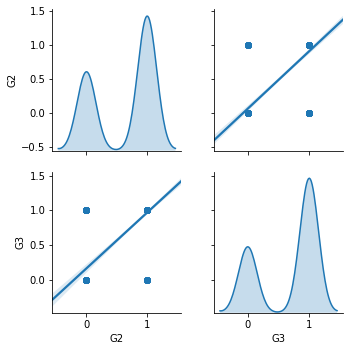

In [29]:
sns.pairplot(data=student_df.iloc[:,25:27],kind='reg',diag_kind='kde')

Inference:-As per the plot above the regression line goes through the center predicting the values very accurately ,hence G2 seems to be a great predictor of G3.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

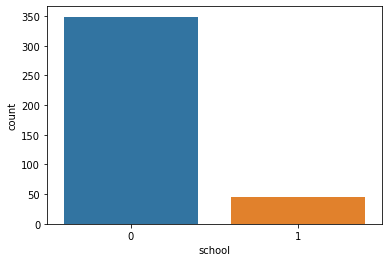

In [32]:
#Plotting the no. of students in each school
sns.countplot(x=student_df.iloc[:,0])

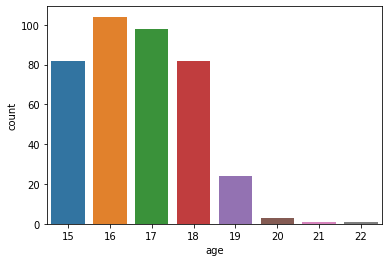

In [34]:
#Plotting number of students with different ages 
sns.countplot(x=student_df.iloc[:,2])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [35]:
#Importing the libraries to split the data into training & testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Independent_attributes,Target_attributes,test_size=0.24)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [36]:
#Importing LogisticRegression model
from sklearn.linear_model import LogisticRegression
#Intitating the model
Logreg=LogisticRegression()
#Fitting the training set to the model
Logreg.fit(x_train,y_train)
#Predicting the y based on the model
y_pred=Logreg.predict(x_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#Importing libraries for getting the accuracy-score & F1 score
from sklearn.metrics import accuracy_score,classification_report
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
f1_score=classification_report(y_test,y_pred)
print("The following is the f1_score:")
print(f1_score)

Accuracy is :0.895
The following is the f1_score:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.97      0.89      0.93        70

    accuracy                           0.89        95
   macro avg       0.86      0.90      0.87        95
weighted avg       0.91      0.89      0.90        95



# Naive bayes with Iris data

### Import Iris.csv

In [38]:
#mporting the llibrary
import pandas as pd
#Importing the dataset
Iris_df=pd.read_csv('iris.csv')
Iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [39]:
#Checking for presence of NaN values
Iris_df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [40]:
#Filling the NaN values
Iris_df.fillna(Iris_df.median(),inplace=True)

In [41]:
#Checking for the presence of NaN values after the = filling operation
Iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [42]:
#Seperating independent & dependent variables
#Declaring X as independent variables dataset
X=Iris_df.iloc[:,1:5]
#Declaring y as dependent variables dataset
y=Iris_df.iloc[:,5]

### Find the distribution of target variable (Class)

In [43]:
#using the describe function to 
y.describe()

count                152
unique                 3
top       Iris-virginica
freq                  52
Name: Species, dtype: object

In [44]:
y.value_counts()

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

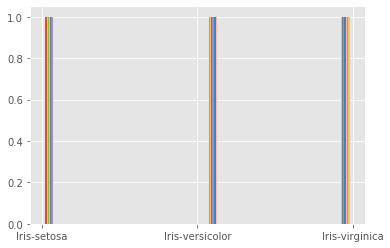

In [65]:
#Plotting the distribution of target variable
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

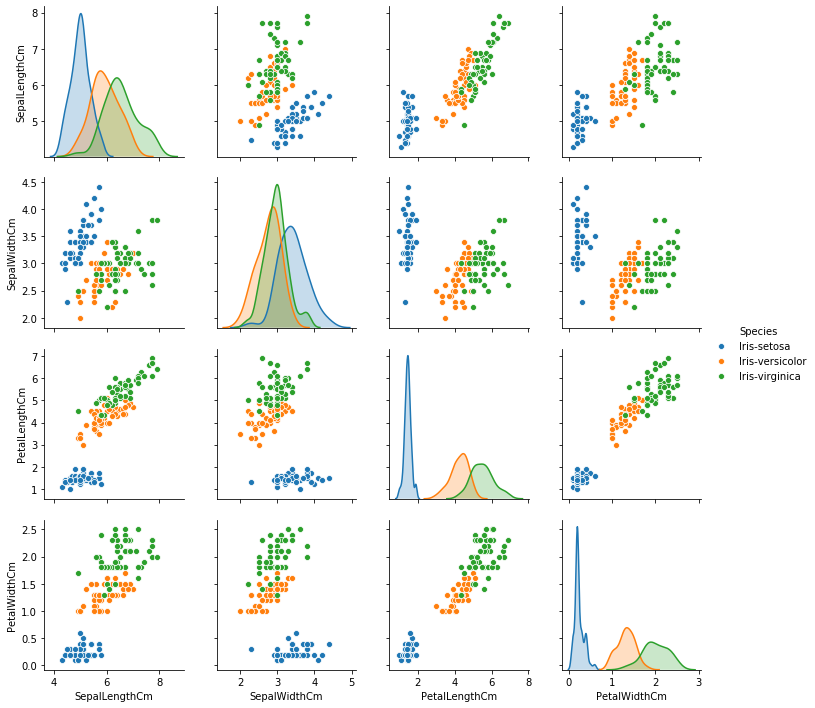

In [46]:
import plotly.express as px
import seaborn as sns
px.scatter_matrix(X,height = 1000)
sns.pairplot(Iris_df.iloc[:,1:6],hue='Species')

### Summary Statistics and explain insights for at least 2 variables

In [47]:
#Getting the summary statistics
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.3,1.30,1.8,2.5


Sepal Width has the least standard deviation which means less variance & the mean is also almost equal to median.

Petal Length has the median to a much right side side of the mean which means it has left skewness

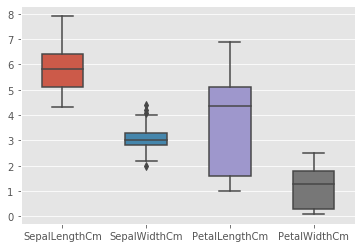

In [66]:
#Visualizing the data stats
sns.boxplot(data=X,width=0.5)

In [49]:
import plotly.graph_objs as go
import plotly
plotly.offline.plot({
    "data" : [go.Box(x=Iris_df.iloc[:,1])]},
auto_open=True)                                                                                                                                                                                      

'temp-plot.html'

### Correlation among all variables and give your insights

In [186]:
#Checking the correlation among the variables
X.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


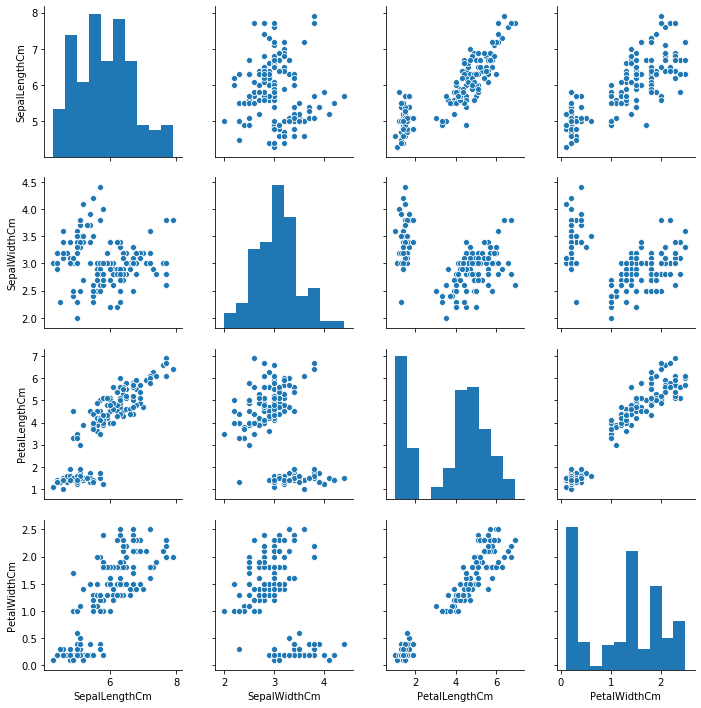

In [185]:
sns.pairplot(X)

The PetalWidth & PetalLength has a positive correlation 
The next comes the correlation between the Petal Length & SepalLength which has less strict positive correlation

### Split data in Training and Validation in 80:20

In [187]:
#Splitting the data into training set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

### Do Feature Scaling

In [133]:
#Performing feature scaling
from sklearn.preprocessing import StandardScaler
standscaler_x = StandardScaler()
X_train = standscaler_x.fit_transform(X_train)
X_test = standscaler_x.transform(X_test)

### Train and Fit NaiveBayes Model

In [188]:
#Training the data with the NaiveBayes model
from sklearn.naive_bayes import GaussianNB
navbay=GaussianNB()
navbay.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [189]:
y_pred=navbay.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

Accuracy is :0.895
The following is the f1_score:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.97      0.89      0.93        70

    accuracy                           0.89        95
   macro avg       0.86      0.90      0.87        95
weighted avg       0.91      0.89      0.90        95

Following is the confusion matrix:
[[23  2]
 [ 8 62]]


Text(0.5, 15.0, 'Predicted value')

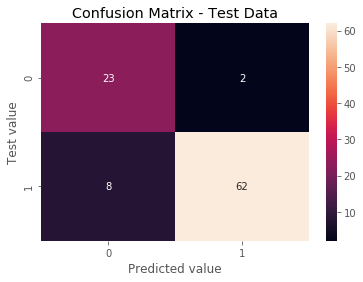

In [67]:
#Printing accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
f1_score=classification_report(y_test,y_pred)
print("The following is the f1_score:")
print(f1_score)
#Printing confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Following is the confusion matrix:")
print(conf_mat)
sns.heatmap(conf_mat,annot=True)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Test value')
plt.xlabel('Predicted value')

Conclusion:-The model has a better accuracy for classifying 0's & 1's but 2 was misinterpreted so most of the time the data was accurately predicted by the model